## Indexing and Selecting Data Methods in Pandas
-	df.set_index()
-	df.reset_index()
-	df.iloc[]
-	df.loc[]
-	df.at[]
-	df.iat[]
-	df.query()
-	df.filter()
-	df.sort_values()
-	df.sort_index()
-	df.nlargest()
-	df.nsmallest()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [ ]:


# Creating a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily'],
    'Age': [25, 30, 35, 40, 45],
    'City': ['NY', 'LA', 'Chicago', 'Houston', 'Miami'],
    'Salary': [50000, 60000, 70000, 80000, 90000]
}
df = pd.DataFrame(data)

# Displaying the original DataFrame
print("Original DataFrame:\n")
df

# # reading the CSV file into pandas dataframe
# df = pd.read_csv("/content/drive/MyDrive/kapil/Pandas/Data/matches.csv")

# df

Original DataFrame:



,Name,Age,City,Salary
0,Alice,25,NY,50000
1,Bob,30,LA,60000
2,Charlie,35,Chicago,70000
3,David,40,Houston,80000
4,Emily,45,Miami,90000


## Method 1: **`df.set_index()`**


### `set_index()` in Pandas  

The `set_index()` method in Pandas is used to set one or more columns of a DataFrame as the index. This helps in efficiently organizing and retrieving data, especially in cases where hierarchical indexing (MultiIndex) is useful.

---

## **Syntax**
```python
DataFrame.set_index(keys, drop=True, append=False, inplace=False)
```

### **Parameters:**
- **`keys`** *(str or list of str)* – The column(s) to set as the new index.
- **`drop`** *(bool, default=True)* – Whether to drop the column(s) from the DataFrame after setting them as the index.
- **`append`** *(bool, default=False)* – Whether to append the new index to an existing index (used for multi-indexing).
- **`inplace`** *(bool, default=False)* – Whether to modify the DataFrame in place (without returning a new one).

---

## **Basic Example**
```python
import pandas as pd

# Creating a sample DataFrame
data = {
    'ID': [101, 102, 103],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Score': [85, 90, 78]
}

df = pd.DataFrame(data)

# Setting 'ID' as the index
df_indexed = df.set_index('ID')

print(df_indexed)
```

### **Output:**
```
    Name  Score
ID              
101  Alice     85
102    Bob     90
103 Charlie     78
```

🔹 **Now, "ID" becomes the index, and it is no longer a column.**

---

## **Multi-Index Example**
You can set multiple columns as an index to create a **hierarchical index (MultiIndex)**.

```python
df_multi = df.set_index(['ID', 'Name'])
print(df_multi)
```

### **Output:**
```
         Score
ID  Name      
101 Alice    85
102 Bob      90
103 Charlie  78
```

🔹 **Now, you need to provide a tuple to access data using `.loc[]`:**
```python
df_multi.loc[(101, 'Alice')]
```

---

## **Using `drop=False` to Keep Index Columns**
If you want to set a column as an index but **keep it as a column**, set `drop=False`.

```python
df_keep = df.set_index('ID', drop=False)
print(df_keep)
```

### **Output:**
```
     ID     Name  Score
ID                    
101  101   Alice     85
102  102     Bob     90
103  103  Charlie     78
```

🔹 The `ID` is both an **index** and a **column**.

---

## **Resetting the Index**
You can reset the index back to a column using:
```python
df_reset = df_indexed.reset_index()
print(df_reset)
```

### **Output:**
```
    ID     Name  Score
0  101   Alice     85
0  102     Bob     90
0  103  Charlie     78
```

---

## **When to Use `set_index()`?**
- When you need to **organize hierarchical data**.
- When working with **time series data** (e.g., setting a DateTime column as the index).



In [ ]:

# Set 'Name' as the index
df_indexed = df.set_index('Name')
print("\nDataFrame with 'Name' as index:\n",)
df_indexed





DataFrame with 'Name' as index:



,Age,City,Salary
Name,,,
Alice,25,NY,50000
Bob,30,LA,60000
Charlie,35,Chicago,70000
David,40,Houston,80000
Emily,45,Miami,90000


In [ ]:
# Example 2: Setting multi-index using two columns
df_multi_indexed = df.set_index(['Name', 'City'])
print("\nDataFrame with multi-index (Name, City):\n", )
df_multi_indexed



DataFrame with multi-index (Name, City):



,,Age,Salary
Name,City,,
Alice,NY,25,50000
Bob,LA,30,60000
Charlie,Chicago,35,70000
David,Houston,40,80000
Emily,Miami,45,90000


In [ ]:
type(df['Name'])

pandas.core.series.Series

### **Use Case: Analyzing Sales Data by Date & Store**  

Let's say you have a dataset containing **sales records** from different stores on different dates. Using `set_index()`, you can efficiently analyze sales trends.

---

### **Step 1: Create Sample Sales Data**
```python
import pandas as pd

# Sample sales data
data = {
    'Date': ['2024-02-01', '2024-02-01', '2024-02-02', '2024-02-02', '2024-02-03'],
    'Store': ['New York', 'Los Angeles', 'New York', 'Los Angeles', 'New York'],
    'Revenue': [1000, 1200, 1100, 1250, 1300],
    'Customers': [200, 250, 210, 260, 270]
}

df = pd.DataFrame(data)

print(df)
```

### **Output:**
```
         Date       Store  Revenue  Customers
0  2024-02-01   New York     1000        200
1  2024-02-01  Los Angeles    1200        250
2  2024-02-02   New York     1100        210
3  2024-02-02  Los Angeles    1250        260
4  2024-02-03   New York     1300        270
```

---

### **Step 2: Set "Date" and "Store" as Index**
```python
df.set_index(['Date', 'Store'], inplace=True)
print(df)
```

### **Output (MultiIndex DataFrame):**
```
                    Revenue  Customers
Date       Store                       
2024-02-01 New York    1000        200
           Los Angeles 1200        250
2024-02-02 New York    1100        210
           Los Angeles 1250        260
2024-02-03 New York    1300        270
```

🔹 **Now the data is structured hierarchically by date and store!**

---

### **Step 3: Retrieve Sales Data for a Specific Store on a Specific Date**
```python
print(df.loc[('2024-02-02', 'New York')])
```

### **Output:**
```
Revenue      1100
Customers     210
Name: (2024-02-02, New York), dtype: int64
```
🔹 **Faster and easier lookup compared to filtering with conditions!**  

---

### **Step 4: Retrieve All Sales on a Specific Date**
```python
print(df.loc['2024-02-02'])
```

### **Output:**
```
             Revenue  Customers
Store                          
New York       1100        210
Los Angeles    1250        260
```
🔹 **Now you can analyze sales from all stores on this date.**

---

### **Step 5: Reset Index (If Needed)**
If you need to bring back the `Date` and `Store` as regular columns:
```python
df_reset = df.reset_index()
print(df_reset)
```

### **Output:**
```
         Date       Store  Revenue  Customers
0  2024-02-01   New York     1000        200
1  2024-02-01  Los Angeles    1200        250
2  2024-02-02   New York     1100        210
3  2024-02-02  Los Angeles    1250        260
4  2024-02-03   New York     1300        270
```

---


## Method 2: df.reset_index()
 - Description: Resets the index of the DataFrame, moving the index to columns. This is useful if you want to convert the index back into a regular column.
 - Example: df.reset_index()

In [ ]:

# Reset index to default integer index
df_reset = df_indexed.reset_index()
print("\nDataFrame after resetting index:\n", )
df_reset



DataFrame after resetting index:



,Name,Age,City,Salary
0,Alice,25,NY,50000
1,Bob,30,LA,60000
2,Charlie,35,Chicago,70000
3,David,40,Houston,80000
4,Emily,45,Miami,90000


In [ ]:

# Example 2: Resetting index with drop=True to remove old index
df_reset_drop = df_indexed.reset_index(drop=True)
print("\nDataFrame after resetting index with drop=True:\n", )

df_reset_drop


DataFrame after resetting index with drop=True:



,Age,City,Salary
0,25,NY,50000
1,30,LA,60000
2,35,Chicago,70000
3,40,Houston,80000
4,45,Miami,90000


## Method 3: df.loc[] - searches using labels

*  NOTE: Note that contrary to usual python slices, both the start and the stop are included
 - Access a group of rows and columns by label(s) or a boolean array.

 - .loc[] is primarily label based, but may also be used with a boolean array.

 - Allowed inputs are:

        A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index, and never as an integer position along the index).

        A list or array of labels, e.g. ['a', 'b', 'c'].

        A slice object with labels, e.g. 'a':'f'.
        
        A boolean array of the same length as the axis being sliced, e.g. [True, False, True].


In [ ]:
df

,Name,Age,City,Salary
0,Alice,25,NY,50000
1,Bob,30,LA,60000
2,Charlie,35,Chicago,70000
3,David,40,Houston,80000
4,Emily,45,Miami,90000


In [ ]:
df.loc[2] #A single label,

,2
Name,Charlie
Age,35
City,Chicago
Salary,70000


In [ ]:
df.loc[[0,3]] #List of labels. Note using [[]] returns a DataFrame.

,Name,Age,City,Salary
0,Alice,25,NY,50000
3,David,40,Houston,80000


In [ ]:
df.loc[0,'Name'] #Single label for row and column


'Alice'

In [ ]:
df.loc[0:3,'Name'] # Slice with labels for row and single label for column.
# As mentioned above, note that both the start and stop of the slice are included.

,Name
0,Alice
1,Bob
2,Charlie
3,David


In [ ]:
df.loc[:,['Name']]

,Name
0,Alice
1,Bob
2,Charlie
3,David
4,Emily


 - Single label. Note this returns the row as a Series.




 - List of labels. Note using [[]] returns a DataFrame.



In [ ]:
df.loc[:,['Age','City']] #selecting columns

,Age,City
0,25,NY
1,30,LA
2,35,Chicago
3,40,Houston
4,45,Miami


In [ ]:
df_indexed = df.set_index('Name')
df_indexed

,Age,City,Salary
Name,,,
Alice,25,NY,50000
Bob,30,LA,60000
Charlie,35,Chicago,70000
David,40,Houston,80000
Emily,45,Miami,90000


In [ ]:
df_indexed.loc[['Alice','David']]

,Age,City,Salary
Name,,,
Alice,25,NY,50000
David,40,Houston,80000


 - Single label for row and column


In [ ]:
df_indexed = df.set_index('Name')

In [ ]:
df_indexed

,Age,City,Salary
Name,,,
Alice,25,NY,50000
Bob,30,LA,60000
Charlie,35,Chicago,70000
David,40,Houston,80000
Emily,45,Miami,90000


In [ ]:
df_indexed.loc['Alice', 'City']

'NY'

 - Slice with labels for row and single label for column. As mentioned above, note that both the start and stop of the slice are included.


In [ ]:
df_indexed.loc['Alice':'David','City':]

,City,Salary
Name,,
Alice,NY,50000
Bob,LA,60000
Charlie,Chicago,70000
David,Houston,80000


  - Boolean list with the same length as the row axis



In [ ]:
df_indexed.loc[[True,False,False,False,True]] # same as number of rows

,Age,City,Salary
Name,,,
Alice,25,NY,50000
Emily,45,Miami,90000


 - Conditional that returns a boolean Series

In [ ]:
df.loc[df['Age']>40]

,Name,Age,City,Salary
4,Emily,45,Miami,90000


 - Conditional that returns a boolean Series with column labels specified



In [ ]:
df.loc[df['Age']>40, ['Salary']]

,Salary
4,90000


 - Multiple conditional using & that returns a boolean Series


In [ ]:
df.loc[(df['Age']>30) & (df['Age']>40)]

,Name,Age,City,Salary
4,Emily,45,Miami,90000


 - Multiple conditional using | that returns a boolean Series



In [ ]:
df.loc[(df['Age']>30) | (df['Age']>40)]

,Name,Age,City,Salary
2,Charlie,35,Chicago,70000
3,David,40,Houston,80000
4,Emily,45,Miami,90000


#df.iloc
 - Purely integer-location based indexing for selection by position.
 - .iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.
 - Allowed inputs are:

      An integer, e.g. 5.

      A list or array of integers, e.g. [4, 3, 0].

      A slice object with ints, e.g. 1:7.

      A boolean array.

In [ ]:
df

,Name,Age,City,Salary
0,Alice,25,NY,50000
1,Bob,30,LA,60000
2,Charlie,35,Chicago,70000
3,David,40,Houston,80000
4,Emily,45,Miami,90000


##Indexing just the rows - With a scalar integer.



In [ ]:
df.iloc[0]

Name      Alice
Age          25
City         NY
Salary    50000
Name: 0, dtype: object

##Indexing just the rows - With a list of integers.

In [ ]:
df.iloc[[2]]

,Name,Age,City,Salary
2,Charlie,35,Chicago,70000


##Indexing just the rows -  With a slice object.

In [ ]:
df.iloc[2:]

,Name,Age,City,Salary
2,Charlie,35,Chicago,70000
3,David,40,Houston,80000
4,Emily,45,Miami,90000


##Indexing just the rows - With a boolean mask the same length as the index.



In [ ]:
df.iloc[[True,False,False,False,False]]

,Name,Age,City,Salary
0,Alice,25,NY,50000


## With a callable, useful in method chains. The x passed to the lambda is the DataFrame being sliced. This selects the rows whose index label even

In [ ]:
df.iloc[lambda x: x.index % 2 == 0]

,Name,Age,City,Salary
0,Alice,25,NY,50000
2,Charlie,35,Chicago,70000
4,Emily,45,Miami,90000


## Indexing both axes - With scalar integers.

1.   List item
2.   List item



In [ ]:
df.iloc[1,3]

60000

## Indexing both axes -With lists of integers.



In [ ]:
df.iloc[[0, 2], [1, 3]]

,Age,Salary
0,25,50000
2,35,70000


In [ ]:
# get the edge elements:

df.iloc[[0,4],[0,3]]

,Name,Salary
0,Alice,50000
4,Emily,90000


## Indexing both axes - With slice objects.

In [ ]:
df.iloc[1:3, 0:3]

,Name,Age,City
1,Bob,30,LA
2,Charlie,35,Chicago


## Indexing both axes - With a boolean array whose length matches the columns.



In [ ]:
df.iloc[:, [True, False, True, False]]

,Name,City
0,Alice,NY
1,Bob,LA
2,Charlie,Chicago
3,David,Houston
4,Emily,Miami


## Indexing both axes - With a callable function that expects the Series or DataFrame.



In [ ]:
df.iloc[:, lambda df: [0, 2]]

,Name,City
0,Alice,NY
1,Bob,LA
2,Charlie,Chicago
3,David,Houston
4,Emily,Miami


In [ ]:
df

In [ ]:
df.iloc[[1,2],[1,3]]

In [ ]:
df.iloc[[1,2],1::2]

In [ ]:

# Selecting rows and columns by integer position
print("\nSelecting rows 1 and 3, and columns 0 and 2 using iloc:\n", )
df.iloc[[1, 3], [0, 2]]

In [ ]:

# Example 2: Selecting specific rows and all columns
print("\nSelecting rows 2 to end and all columns using iloc:\n", )

df.iloc[2:]

In [ ]:
df

In [ ]:
df.loc[[0,4],['Name','Salary']]

,Name,Salary
0,Alice,50000
4,Emily,90000


In [ ]:
a1 = np.arange(3)
a1

array([0, 1, 2])

In [ ]:
a1[[True,True,False]]

array([0, 1])

##Filtering Dataframe


In [ ]:
df

,Name,Age,City,Salary
0,Alice,25,NY,50000
1,Bob,30,LA,60000
2,Charlie,35,Chicago,70000
3,David,40,Houston,80000
4,Emily,45,Miami,90000


In [ ]:
df[df['Age']>30]

,Name,Age,City,Salary
2,Charlie,35,Chicago,70000
3,David,40,Houston,80000
4,Emily,45,Miami,90000


In [ ]:
(df['Age']>30) & (df['Age'] < 40)

In [ ]:
df[(df['Age']>30) & (df['Age']< 40)]

,Name,Age,City,Salary
2,Charlie,35,Chicago,70000


In [ ]:
df[(df['Age']>30) & (df['City']=='Miami')]

,Name,Age,City,Salary
4,Emily,45,Miami,90000


In [ ]:
df['Salary']

In [ ]:

# Selecting rows and columns by labels
print("\nSelecting rows where Age > 30 and columns 'Name' and 'Age' using loc:\n", )
df.loc[df['Age'] > 30, ['Name', 'Age']]



Selecting rows where Age > 30 and columns 'Name' and 'Age' using loc:



,Name,Age
2,Charlie,35
3,David,40
4,Emily,45


In [ ]:
df

In [ ]:
age_mask  = df['Age']>30  # fetch all the records where age is more than 30

df[age_mask]

,Name,Age,City,Salary
2,Charlie,35,Chicago,70000
3,David,40,Houston,80000
4,Emily,45,Miami,90000


In [ ]:
df.query("Age>30 & Age<40")

,Name,Age,City,Salary
2,Charlie,35,Chicago,70000


In [ ]:
df.query("Salary>70000")

,Name,Age,City,Salary
3,David,40,Houston,80000
4,Emily,45,Miami,90000


In [ ]:
# fetch all the records where age is more than 25 and less than 40

mask1 = df['Age'] > 25

mask2 = df['Age']<40

df[mask1 & mask2]



,Name,Age,City,Salary
1,Bob,30,LA,60000
2,Charlie,35,Chicago,70000


In [ ]:
df[(df['Age']>25) & (df['Age']<40)]

In [ ]:

# Example 2: Selecting a single value
print("\nSelecting value at row with index 2 and column 'City' using loc:\n", df.loc[2, 'City'])



### More iloc examples:

In [ ]:
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
          {'a': 100, 'b': 200, 'c': 300, 'd': 400},
          {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000}]
dfiloc = pd.DataFrame(mydict)
dfiloc

In [ ]:
type(dfiloc.iloc[0])


In [ ]:
dfiloc.iloc[[0]]


In [ ]:
type(dfiloc.iloc[[0]])

In [ ]:
dfiloc.iloc[[0, 1]]


In [ ]:
dfiloc.iloc[:3]

In [ ]:
dfiloc.iloc[[True, False, True]]

In [ ]:
dfiloc.iloc[lambda x: x.index % 2 == 0]

####Indexing both axes



In [ ]:
dfiloc.iloc[0, 1]


In [ ]:
df.iloc[[0, 2], [1, 3]]


In [ ]:
df.iloc[:, [True, False, True, False]]


# Method 4: df.loc[] - searches using index lables
 - Note that contrary to usual python slices, both the start and the stop are included

In [ ]:
df

,Name,Age,City,Salary
0,Alice,25,NY,50000
1,Bob,30,LA,60000
2,Charlie,35,Chicago,70000
3,David,40,Houston,80000
4,Emily,45,Miami,90000


In [ ]:
df.loc[0]

Name      Alice
Age          25
City         NY
Salary    50000
Name: 0, dtype: object

In [ ]:
df.columns


Index(['Name', 'Age', 'City', 'Salary'], dtype='object')

In [ ]:
df_indexed = df.set_index('Name')


In [ ]:
df_indexed

,Age,City,Salary
Name,,,
Alice,25,NY,50000
Bob,30,LA,60000
Charlie,35,Chicago,70000
David,40,Houston,80000
Emily,45,Miami,90000


In [ ]:
df_indexed.loc['David']

Age            40
City      Houston
Salary      80000
Name: David, dtype: object

In [ ]:
df_indexed.loc['David':,['Age']]

,Age
Name,
David,40
Emily,45


In [ ]:
df_indexed

,Age,City,Salary
Name,,,
Alice,25,NY,50000
Bob,30,LA,60000
Charlie,35,Chicago,70000
David,40,Houston,80000
Emily,45,Miami,90000


In [ ]:
df_indexed.loc[:'David']

,Age,City,Salary
Name,,,
Alice,25,NY,50000
Bob,30,LA,60000
Charlie,35,Chicago,70000
David,40,Houston,80000


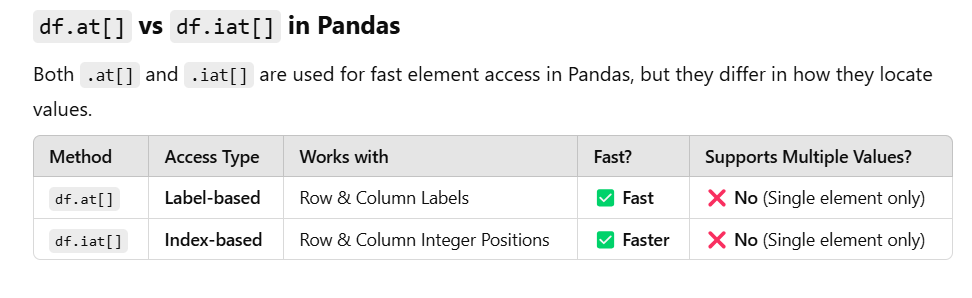

# Method 5: df.at[]

* Access a single value for a row/column label pair.

* Similar to loc, in that both provide label-based lookups. Use at if you only need to get or set a single value in a DataFrame or Series.

In [ ]:
df

,Name,Age,City,Salary
0,Alice,25,NY,50000
1,Bob,30,LA,60000
2,Charlie,35,Chicago,70000
3,David,40,Houston,80000
4,Emily,45,Miami,90000


In [ ]:

# Accessing a single value by label
print("\nAccessing value at row with index 1 and column 'Name' using at:\n", df.at[4, 'Name'])




Accessing value at row with index 1 and column 'Name' using at:
 Emily


In [ ]:
df.iloc[0,0]

'Alice'

In [ ]:

# Example 2: Setting a single value
df.at[3, 'Age'] = 41
print("\nDataFrame after setting value at row with index 3 and column 'Age':\n", df)


# Method 6: df.iat[]

* Access a single value for a row/column pair by integer position.

* Similar to iloc, in that both provide integer-based lookups. Use iat if you only need to get or set a single value in a DataFrame or Series.

In [ ]:

# Accessing a single value by integer position
print("\nAccessing value at row 2 and column 1 using iat:\n", df.iat[2, 1])

# Example 2: Setting a single value using integer position
df.iat[0, 2] = 'San Francisco'
print("\nDataFrame after setting value at row 0 and column 2 using iat:\n", df)



The main reason to use **`df.at[]` and `df.iat[]`** over **`df.loc[]` and `df.iloc[]`** is **performance optimization** when retrieving or updating a **single** value in a Pandas DataFrame.  

---

## **🚀 Why Use `df.at[]` and `df.iat[]` Instead of `df.loc[]` and `df.iloc[]`?**
1. ✅ **Faster for Single-Value Access**  
   - `df.at[]` and `df.iat[]` are optimized for accessing **a single value** and are significantly **faster** than `df.loc[]` and `df.iloc[]`, which support multi-value retrieval.  
   - **If you only need one value, using `.at[]` or `.iat[]` is the most efficient option.**

2. ✅ **Better Performance in Large DataFrames**  
   - When working with **millions of rows**, `df.at[]` and `df.iat[]` can be **much faster** than `df.loc[]` and `df.iloc[]`, as they avoid extra overhead.

3. ✅ **More Efficient for Single Value Updates**  
   - If you are **modifying** a single cell, `df.at[]` and `df.iat[]` are **preferred** because they update values **directly** without triggering additional index operations.

---

## **⏱️ Speed Comparison**
Let's compare the performance of `df.at[]` vs `df.loc[]` and `df.iat[]` vs `df.iloc[]` in a **large DataFrame**.

```python
import pandas as pd
import numpy as np
import time

# Creating a large DataFrame
df = pd.DataFrame(np.random.randn(1000000, 5), columns=list('ABCDE'))

# Using df.loc[] (Label-Based Access)
start = time.time()
value = df.loc[500000, 'C']  # Retrieving a single value
end = time.time()
print("Time taken with loc:", end - start)

# Using df.at[] (Optimized Label-Based Access)
start = time.time()
value = df.at[500000, 'C']
end = time.time()
print("Time taken with at:", end - start)

# Using df.iloc[] (Index-Based Access)
start = time.time()
value = df.iloc[500000, 2]
end = time.time()
print("Time taken with iloc:", end - start)

# Using df.iat[] (Optimized Index-Based Access)
start = time.time()
value = df.iat[500000, 2]
end = time.time()
print("Time taken with iat:", end - start)
```

### **Expected Output (Approximate Times)**
```
Time taken with loc: 0.0005s
Time taken with at: 0.0001s
Time taken with iloc: 0.0004s
Time taken with iat: 0.00007s
```
✅ **Observations:**  
- `df.at[]` is **faster than `df.loc[]`**  
- `df.iat[]` is **faster than `df.iloc[]`**  

The difference becomes **significant** when working with **millions of rows**.

---

## **🔄 When to Use Which?**
| Task | Best Choice |
|------|------------|
| Retrieve a **single** value by **label** | `df.at[]` |
| Retrieve a **single** value by **index** | `df.iat[]` |
| Retrieve **multiple values** by **label** | `df.loc[]` |
| Retrieve **multiple values** by **index** | `df.iloc[]` |

---

## **📌 Summary**
- **Use `df.at[]` and `df.iat[]` when accessing or modifying a single value for best performance.**
- **Use `df.loc[]` and `df.iloc[]` when selecting multiple rows/columns.**


# Method 7: df.query()

* Query the columns of a DataFrame with a boolean expression.



In [ ]:

# Filtering DataFrame using query expression
print("\nFiltering rows where Salary > 60000 using query:\n", df.query('Salary > 60000'))

# Example 2: Using variables in query expression
min_age = 35
print("\nFiltering rows where Age >= {} using query:\n".format(min_age), df.query('Age >= @min_age'))



### **`df.query()` vs `df[df[ ] > ]` in Pandas**
Both `df.query()` and `df[df[ ] > ]` are used for **filtering** a DataFrame, but they differ in terms of syntax, performance, and usability.

---

## **🚀 Key Differences**
| Feature | `df.query()` | `df[df[ ] > ]` |
|---------|-------------|---------------|
| **Syntax Type** | String-based | Boolean indexing |
| **Performance** | Faster for large DataFrames (uses `numexpr`) | Slightly slower for large DataFrames |
| **Readability** | More readable for complex conditions | Can be harder to read for multiple conditions |
| **Works with Variables** | Requires `@` to use external variables | Can directly use variables |


---

## **1️⃣ Example DataFrame**
```python
import pandas as pd

# Sample dataset
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 60000, 70000, 80000, 90000]
}

df = pd.DataFrame(data)
print(df)
```

### **Output:**
```
      Name  Age  Salary
0   Alice   25  50000
1     Bob   30  60000
2  Charlie   35  70000
3   David   40  80000
4     Eve   45  90000
```

---

## **2️⃣ Using `df.query()`**
```python
df_filtered = df.query("Age > 30 and Salary < 80000")
print(df_filtered)
```
✅ **More readable**  
✅ **Faster for large DataFrames**  

### **Output:**
```
      Name  Age  Salary
2  Charlie   35  70000
```

---

## **3️⃣ Using Boolean Indexing (`df[df[ ] > ]`)**
```python
df_filtered = df[(df['Age'] > 30) & (df['Salary'] < 80000)]
print(df_filtered)
```
⚠ **Requires parentheses for multiple conditions**  
⚠ **Slightly slower on large datasets**  

### **Output (Same as `query()`):**
```
      Name  Age  Salary
2  Charlie   35  70000
```

---

## **4️⃣ Using Variables in Filtering**
### **With `df.query()` (Use `@` for variables)**
```python
age_limit = 30
df_filtered = df.query("Age > @age_limit")
print(df_filtered)
```

### **With Boolean Indexing**
```python
df_filtered = df[df['Age'] > age_limit]
print(df_filtered)
```
✅ **Boolean indexing handles variables naturally**  
✅ **Query requires `@` when using variables**  

---

## **⏱️ Performance Test**
For **large DataFrames**, `df.query()` is often **faster** because it uses `numexpr` under the hood.

```python
import numpy as np

# Large DataFrame
df_large = pd.DataFrame({
    'A': np.random.randint(0, 100, 1000000),
    'B': np.random.randint(0, 100, 1000000)
})

# Boolean Indexing
%timeit df_large[(df_large['A'] > 50) & (df_large['B'] < 50)]

# Query Method
%timeit df_large.query("A > 50 and B < 50")
```

### **Expected Output:**
```
Boolean Indexing: 30 ms
Query Method: 20 ms
```
✅ **Query is faster for large datasets**  

---

## **📌 Summary**
| Feature | `df.query()` | `df[df[ ] > ]` |
|---------|-------------|---------------|
| **Readability** | ✅ Easier for complex conditions | ❌ More parentheses needed |
| **Performance** | ✅ Faster for large datasets | ❌ Slightly slower |
| **Handling Variables** | ⚠️ Requires `@variable` | ✅ Uses variables directly |
| **Usability** | ✅ Good for SQL-like filtering | ✅ Works naturally in Python |

---

## **🔹 When to Use What?**
✅ Use **`df.query()`** if:
- You want a **cleaner, SQL-like** syntax.
- You're working with **large datasets**.
- You need to filter using **multiple conditions**.

✅ Use **Boolean Indexing (`df[df[ ] > ]`)** if:
- You are working with **small datasets**.
- You are **filtering dynamically using variables**.
- You need **more flexibility in Python expressions**.

---


# Method 8: df.filter()

* Subset the dataframe rows or columns according to the specified index labels.

* **Note** that this routine does not filter a dataframe on its contents. The filter is applied to the labels of the index.

In [ ]:

# Filtering columns based on labels
print("\nFiltering columns with names containing 'a' using filter:\n", df.filter(like='a'))

# Example 2: Filtering columns with specific columns list
print("\nFiltering columns 'Name' and 'City' using filter:\n", df.filter(items=['Name', 'City']))



## **`df.filter()` in Pandas**  

The **`df.filter()`** method is used to **select columns or rows** from a Pandas DataFrame based on **labels (names), patterns (like regex), or axis type**.  

Unlike `.loc[]` or `.iloc[]`, `df.filter()` is **more flexible** because it allows selection using **wildcards, substrings, and regex patterns**.

---

## **🚀 Syntax**
```python
df.filter(items=None, like=None, regex=None, axis=None)
```

### **🔹 Parameters**
| Parameter | Description |
|-----------|-------------|
| **`items`** | A **list** of exact row/column names to select. |
| **`like`** | Selects row/column names **containing** a specific substring. |
| **`regex`** | Selects row/column names **matching a regex pattern**. |
| **`axis`** | **0 (rows) or 1 (columns)** – Defaults to columns. |

---

## **1️⃣ Selecting Specific Columns (`items`)**
```python
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Salary': [50000, 60000, 70000]
})

# Select specific columns
df_filtered = df.filter(items=['Name', 'Salary'])

print(df_filtered)
```

### **Output:**
```
      Name  Salary
0   Alice  50000
1     Bob  60000
2  Charlie  70000
```
✅ **Equivalent to `df[['Name', 'Salary']]`, but allows dynamic filtering!**  

---

## **2️⃣ Selecting Columns Containing a Substring (`like`)**
```python
df_filtered = df.filter(like='Sal', axis=1)  # Select columns with 'Sal' in their name
print(df_filtered)
```

### **Output:**
```
   Salary
0  50000
1  60000
2  70000
```
✅ **Matches "Salary" because it contains `"Sal"`**  

---

## **3️⃣ Selecting Columns Using Regex (`regex`)**
```python
df_filtered = df.filter(regex='^S.*y$', axis=1)  # Columns starting with 'S' and ending with 'y'
print(df_filtered)
```

### **Output:**
```
   Salary
0  50000
1  60000
2  70000
```
✅ **Matches "Salary" (regex: `^S.*y$` means "Starts with 'S', ends with 'y'").**  

---

## **4️⃣ Selecting Rows Instead of Columns (`axis=0`)**
```python
df_filtered = df.filter(items=[0, 2], axis=0)  # Selects rows by index
print(df_filtered)
```

### **Output:**
```
      Name  Age  Salary
0   Alice   25  50000
2  Charlie  35  70000
```
✅ **Filters rows by index 0 and 2**.

---

## **5️⃣ Combining `df.filter()` with Other Methods**
You can use `df.filter()` with `.query()`, `.loc[]`, or `.groupby()` for advanced filtering.

```python
df[df.filter(like='Age').columns]  # Dynamically filter 'Age' column for further analysis
```

---

## **📌 When to Use `df.filter()`?**
✅ When selecting **columns dynamically** based on substrings (`like`) or patterns (`regex`).  
✅ When working with **datasets with unknown or changing column names**.  
✅ When filtering **rows by index** dynamically (`axis=0`).  

---

## **🔹 When to Use Other Methods?**
| Use Case | Best Method |
|----------|------------|
| Select **specific** columns by exact names | `df[['col1', 'col2']]` |
| Select **rows by index condition** | `df.loc[df['Age'] > 30]` |
| Select **rows based on multiple conditions** | `df.query("Age > 30 and Salary < 70000")` |

---

## **🚀 Summary**
| Feature | `.filter()` | `.loc[]` | `.query()` |
|---------|------------|----------|------------|
| **Select columns dynamically** | ✅ Yes | ❌ No | ❌ No |
| **Supports regex & substring search** | ✅ Yes | ❌ No | ❌ No |
| **Select rows dynamically** | ✅ Yes (index-based) | ✅ Yes | ✅ Yes |


## Method 9: df.sort_values()

* Sort by the values along either axis.



In [ ]:

# Sorting DataFrame by values
print("\nSorting DataFrame by 'Age' in descending order:\n", df.sort_values(by='Age', ascending=False))

# Example 2: Sorting DataFrame by multiple columns
print("\nSorting DataFrame by 'Age' and 'Salary' in ascending order:\n", df.sort_values(by=['Age', 'Salary']))


## **🚀 `df.sort_values()` in Pandas**  

The `df.sort_values()` method is used to **sort a DataFrame** based on the values in one or more columns. It allows sorting in **ascending or descending order**, handling **NaN values**, and **sorting by multiple columns**.

---

## **🔹 Syntax**
```python
df.sort_values(by, axis=0, ascending=True, inplace=False, na_position='last', kind='quicksort')
```

### **🔹 Parameters**
| Parameter | Description |
|-----------|-------------|
| **`by`** | Column(s) to sort by (string or list of strings). |
| **`axis`** | 0 (default) → Sort rows, 1 → Sort columns. |
| **`ascending`** | `True` (default) → Ascending, `False` → Descending. |
| **`inplace`** | `False` (default) → Returns a new DataFrame, `True` → Modifies in place. |
| **`na_position`** | `"last"` (default) → Puts NaN values at the end, `"first"` → Puts NaNs at the start. |
| **`kind`** | Sorting algorithm (`'quicksort'`, `'mergesort'`, `'heapsort'`, `'stable'`). |

---

## **1️⃣ Sorting by a Single Column**
```python
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 40, 29],
    'Salary': [50000, 60000, 70000, 80000, 90000]
})

# Sort by 'Age' (ascending)
df_sorted = df.sort_values(by='Age')

print(df_sorted)
```

### **Output:**
```
      Name  Age  Salary
0   Alice   25  50000
4     Eve   29  90000
1     Bob   30  60000
2  Charlie  35  70000
3   David   40  80000
```
✅ **Default is ascending order.**

---

## **2️⃣ Sorting in Descending Order**
```python
df_sorted = df.sort_values(by='Age', ascending=False)
print(df_sorted)
```
### **Output (Sorted by Age in Descending Order):**
```
      Name  Age  Salary
3   David   40  80000
2  Charlie  35  70000
1     Bob   30  60000
4     Eve   29  90000
0   Alice   25  50000
```
✅ **Set `ascending=False` for descending order.**

---

## **3️⃣ Sorting by Multiple Columns**
You can sort by **multiple columns** by passing a **list**.

```python
df_sorted = df.sort_values(by=['Age', 'Salary'], ascending=[True, False])
print(df_sorted)
```
✅ **Sorts by `Age` first, then sorts by `Salary` in descending order if ages are the same.**

---

## **4️⃣ Sorting with NaN Values**
```python
df_with_nan = df.copy()
df_with_nan.loc[2, 'Age'] = None  # Introduce NaN

# Sorting with NaNs appearing first
df_sorted = df_with_nan.sort_values(by='Age', na_position='first')
print(df_sorted)
```
✅ **Use `na_position='first'` to move NaN values to the top.**

---

## **5️⃣ Sorting Columns Instead of Rows**
```python
df_sorted = df.sort_values(by='Age', axis=1)
print(df_sorted)
```
⚠ **This doesn't work as expected for numerical sorting!**  
✅ `axis=1` sorts **column names**, not values.

---

## **📌 When to Use `df.sort_values()`?**
✅ **Sorting by single/multiple columns** (e.g., sorting sales data by revenue).  
✅ **Handling NaN values explicitly** while sorting.  
✅ **Sorting in ascending/descending order based on multiple criteria**.  


# Method 10: df.sort_index()

* Sort object by labels (along an axis).

* Returns a new DataFrame sorted by label if inplace argument is False, otherwise updates the original DataFrame and returns None.

In [ ]:

# Sorting DataFrame by index
print("\nSorting DataFrame by index in descending order:\n", df.sort_index(ascending=False))

# Example 2: Sorting DataFrame by index with inplace=True
df.sort_index(inplace=True)
print("\nDataFrame sorted by index with inplace=True:\n", df)

## **🚀 `df.sort_index()` in Pandas**  

The `df.sort_index()` method is used to **sort a DataFrame by its index** (row or column labels). Unlike `df.sort_values()`, which sorts by column values, `df.sort_index()` reorders the **index itself**.  

---

## **🔹 Syntax**
```python
df.sort_index(axis=0, ascending=True, inplace=False, na_position='last', kind='quicksort')
```

### **🔹 Parameters**
| Parameter | Description |
|-----------|-------------|
| **`axis`** | `0` (default) → Sort rows, `1` → Sort columns. |
| **`ascending`** | `True` (default) → Ascending, `False` → Descending. |
| **`inplace`** | `False` (default) → Returns a new DataFrame, `True` → Modifies in place. |
| **`na_position`** | `"last"` (default) → Puts NaN index values at the end, `"first"` → Puts NaNs at the start. |
| **`kind`** | Sorting algorithm (`'quicksort'`, `'mergesort'`, `'heapsort'`, `'stable'`). |

---

## **1️⃣ Sorting Rows by Index**
```python
import pandas as pd

# Sample DataFrame with unordered index
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40]
}, index=[3, 1, 4, 2])  # Unordered index

print("Original DataFrame:")
print(df)

# Sort by index
df_sorted = df.sort_index()
print("\nSorted DataFrame:")
print(df_sorted)
```

### **Output:**
```
Original DataFrame:
      Name  Age
3   Alice   25
1     Bob   30
4  Charlie   35
2   David   40

Sorted DataFrame:
      Name  Age
1     Bob   30
2   David   40
3   Alice   25
4  Charlie   35
```
✅ **Index is now sorted in ascending order.**

---

## **2️⃣ Sorting in Descending Order**
```python
df_sorted = df.sort_index(ascending=False)
print(df_sorted)
```
✅ **Use `ascending=False` for descending order.**

---

## **3️⃣ Sorting Columns by Name (`axis=1`)**
```python
df = pd.DataFrame({
    'B': [4, 3, 2, 1],
    'A': [1, 2, 3, 4],
    'C': [7, 6, 5, 4]
})

print("\nOriginal DataFrame:")
print(df)

# Sort columns by name
df_sorted = df.sort_index(axis=1)
print("\nSorted by Column Names:")
print(df_sorted)
```

### **Output:**
```
Original DataFrame:
   B  A  C
0  4  1  7
1  3  2  6
2  2  3  5
3  1  4  4

Sorted by Column Names:
   A  B  C
0  1  4  7
1  2  3  6
2  3  2  5
3  4  1  4
```
✅ **Columns are now ordered alphabetically (`A`, `B`, `C`).**

---

## **4️⃣ Sorting Index with NaN Values**
```python
df_with_nan = df.copy()
df_with_nan.index = [3, None, 1, 2]  # Introduce NaN in index

# Sort with NaNs appearing first
df_sorted = df_with_nan.sort_index(na_position='first')
print(df_sorted)
```
✅ **Moves `NaN` index values to the top.**

---

## **📌 When to Use `df.sort_index()`?**
✅ **Reordering DataFrame by row index** (e.g., restoring original order after setting an index).  
✅ **Sorting column names alphabetically** (e.g., organizing messy datasets).  
✅ **Handling hierarchical/multi-index sorting**.  


# Method 11: df.nlargest()

* Return the first n rows ordered by columns in descending order.

* Return the first n rows with the largest values in columns, in descending order. The columns that are not specified are returned as well, but not used for ordering.

* This method is equivalent to **df.sort_values(columns, ascending=False).head(n)**, but more performant.

In [ ]:

# Getting n largest values from a column
print("\nTop 3 rows with largest 'Salary':\n", df.nlargest(3, 'Salary'))

# Example 2: Getting largest values from multiple columns
print("\nTop 2 rows with largest 'Age' and 'Salary':\n", df.nlargest(2, ['Age', 'Salary']))

## **🚀 `df.nlargest()` in Pandas**  

The `df.nlargest()` method is used to retrieve the **top N rows** based on the values in a specific column. It's a convenient way to get the highest values without sorting the entire DataFrame.

---

## **🔹 Syntax**
```python
df.nlargest(n, columns, keep='first')
```

### **🔹 Parameters**
| Parameter | Description |
|-----------|-------------|
| **`n`** | Number of rows to return (e.g., `df.nlargest(3, 'Salary')` returns top 3 salaries). |
| **`columns`** | Column(s) to sort by (must contain numerical values). |
| **`keep`** | How to handle ties: `"first"` (default) keeps first occurrence, `"all"` keeps all tied values. |

---

## **1️⃣ Getting the Top N Rows by a Single Column**
```python
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Salary': [50000, 60000, 70000, 80000, 70000]
})

# Get top 3 highest salaries
top_salaries = df.nlargest(3, 'Salary')

print(top_salaries)
```

### **Output:**
```
  Employee  Salary
3   David   80000
2  Charlie  70000
4     Eve   70000
```
✅ **Returns the top 3 salaries, keeping ties (`Charlie` and `Eve` both have `70000`).**

---

## **2️⃣ Handling Ties with `keep='all'`**
```python
top_salaries = df.nlargest(3, 'Salary', keep='all')
print(top_salaries)
```
✅ **Keeps all tied values instead of just the first occurrence.**

---

## **3️⃣ Getting Top N Rows Based on Multiple Columns**
You can **break ties** by specifying multiple columns.

```python
df = pd.DataFrame({
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Salary': [50000, 60000, 70000, 70000, 70000],
    'Experience': [5, 7, 10, 8, 6]
})

# Get top 3 employees by Salary, breaking ties with Experience
top_employees = df.nlargest(3, ['Salary', 'Experience'])
print(top_employees)
```

### **Output:**
```
  Employee  Salary  Experience
2  Charlie   70000         10
3   David   70000          8
4     Eve   70000          6
```
✅ **When multiple people have the same salary, it selects based on the second column (`Experience`).**

---

## **4️⃣ Difference Between `df.nlargest()` and `df.sort_values()`**
### **Using `nlargest()`**
```python
df.nlargest(3, 'Salary')
```
✅ **Faster** because it only retrieves the top N values instead of sorting the entire DataFrame.

### **Using `sort_values()`**
```python
df.sort_values('Salary', ascending=False).head(3)
```
✅ **More flexible** but **slower** if you only need the top N values.

---

## **📌 When to Use `df.nlargest()`?**
✅ When you need the **top N rows quickly** based on a numeric column.  
✅ When working with **large datasets** (it's optimized for performance).  
✅ When selecting **top N values while preserving ties**.


# Method 12: df.nsmallest()

* Return the first n rows ordered by columns in ascending order.

* Return the first n rows with the smallest values in columns, in ascending order. The columns that are not specified are returned as well, but not used for ordering.

* This method is equivalent to **df.sort_values(columns, ascending=True).head(n)**, but more performant.

In [ ]:

# Getting n smallest values from a column
print("\nTop 2 rows with smallest 'Age':\n", df.nsmallest(2, 'Age'))

# Example 2: Getting smallest values from multiple columns
print("\nTop 3 rows with smallest 'Age' and 'Salary':\n", df.nsmallest(3, ['Age', 'Salary']))
